<a href="https://colab.research.google.com/github/tthawatch/DPDM/blob/master/RF_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [4]:
digits['data'].shape

(1797, 64)

In [5]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

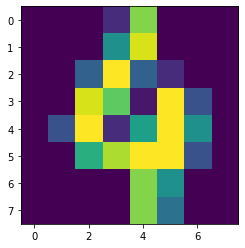

In [7]:
from matplotlib import pyplot as plt
plt.imshow(digits['images'][100])
digits['images'][100]

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.2, random_state=6)

In [18]:
y_test.shape

(360,)

In [19]:
y_train.shape

(1437,)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier(random_state=0)

In [23]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
tree.score(X_test,y_test)

0.8388888888888889

In [25]:
N = 100 

In [27]:
training_data = list()
for i in range(N):
  X_sp, X_dp, y_sp, y_dp =train_test_split(X_train, y_train, test_size=0.2,ramdom_state = i+6)
  training_data.append({'X':X_sp,'y':y_sp})

TypeError: ignored

In [ ]:
Classifier_forest = list()
for i in range(N):
  tree = DecisionTreeClassifier(max_features='sqrt',random_state=i+2)
  tree.fit(training_data[i]['X'],training_data[i]['y'])
  Classifier_forest

In [ ]:
prediction = list()
for i in range(N):
  pred = clssifier_

In [ ]:
from scipy import stats
import numpy as np


In [ ]:
m = stats.mode

In [ ]:
from 